# **Ensemble (multisim) DP integration**

Run a bunch of DP Langevin equation integrations as part of the process of checking that we get true DP scaling behavior.

Note: because this notebook uses `multiprocessing`, it cannot be run from the command line using `ipython`. 
That's because `multiprocessing` requires the entry point of a script to be via an
`if __name__ == '__main__'` or "main guard" block.
So, a pure Python script with such a guard — such as `batch_ensemble.py` — is needed: 
just customize it to simulate a single-size grid "batch" 
rather than a range of grid sizes.

<hr>

## Preliminaries

In [1]:
from essentials import *
dplvn.__version__

'2025.11.5a2'

<hr>

## Choice

In [2]:
# a_critical: str
# ensemble_name: str
# if len(sys.argv) > 2:
#     a_critical = sys.argv[1]
#     ensemble_name = sys.argv[2]
#     print(f"DPEnsemble: running job in {a_critical}/{ensemble_name}")
# else:

a_critical = "ac1p18857"
ensemble_name = "b1_D0p04_η1_x31_y31_Δx1_Δt0p1"
# ensemble_name = "b1_D0p04_η1_x62_y62_Δx1_Δt0p1"
# ensemble_name = "b1_D0p04_η1_x125_y125_Δx1_Δt0p1"
# ensemble_name = "b1_D0p04_η1_x250_y250_Δx1_Δt0p1"
# ensemble_name = "b1_D0p04_η1_x500_y500_Δx1_Δt0p1"
# ensemble_name = "b1_D0p04_η1_x1000_y1000_Δx1_Δt0p1"
# ensemble_name = "b1_D0p04_η1_x2000_y2000_Δx1_Δt0p1"



<hr>

## Simulation

In [3]:
info_path: list[str] = [pardir, "experiments", a_critical, ensemble_name]
do_verbose: bool = True

In [4]:
ensemble = Ensemble(info_path, do_verbose,)

Ensemble results path:  ['..', 'experiments', 'ac1p18857', 'b1_D0p04_η1_x31_y31_Δx1_Δt0p1']
a: [1.19857, 1.19714, 1.19571, 1.19428, 1.19286, 1.19143, 1.19, 1.18857, 1.18714, 1.18571, 1.18428, 1.18286, 1.18143, 1.18, 1.17857]
b: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
seeds: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [5]:
ensemble.info["Misc"]

{'n_sims': 15,
 'Δa_range': 0.01,
 'n_round_Δt_summation': 5,
 'n_segments': 500,
 'n_digits': 6,
 'do_export_combo_graphs': True,
 'do_export_combo_data': True,
 'do_export_graphs': False,
 'do_export_data': False,
 'do_export_images': False,
 'do_make_video': False,
 'ylimits_log': [0.0005, 2.0],
 'xlimits_log': [0.5, 12000.0],
 'ylimits_rescaled': [0.03, 10.0],
 'xlimits_rescaled': [5e-05, 2000.0],
 'video_frame_rate': 50,
 'video_format': 'mp4',
 'path': ['..', 'experiments', 'ac1p18857', 'b1_D0p04_η1_x31_y31_Δx1_Δt0p1'],
 'n_cores': 16}

In [6]:
ensemble.create()

Simulation#1 path:  ['..', 'experiments', 'ac1p18857', 'b1_D0p04_η1_x31_y31_Δx1_Δt0p1', 'a1p19857']
Simulation#2 path:  ['..', 'experiments', 'ac1p18857', 'b1_D0p04_η1_x31_y31_Δx1_Δt0p1', 'a1p19714']
Simulation#3 path:  ['..', 'experiments', 'ac1p18857', 'b1_D0p04_η1_x31_y31_Δx1_Δt0p1', 'a1p19571']
Simulation#4 path:  ['..', 'experiments', 'ac1p18857', 'b1_D0p04_η1_x31_y31_Δx1_Δt0p1', 'a1p19428']
Simulation#5 path:  ['..', 'experiments', 'ac1p18857', 'b1_D0p04_η1_x31_y31_Δx1_Δt0p1', 'a1p19286']
Simulation#6 path:  ['..', 'experiments', 'ac1p18857', 'b1_D0p04_η1_x31_y31_Δx1_Δt0p1', 'a1p19143']
Simulation#7 path:  ['..', 'experiments', 'ac1p18857', 'b1_D0p04_η1_x31_y31_Δx1_Δt0p1', 'a1p19000']
Simulation#8 path:  ['..', 'experiments', 'ac1p18857', 'b1_D0p04_η1_x31_y31_Δx1_Δt0p1', 'a1p18857']
Simulation#9 path:  ['..', 'experiments', 'ac1p18857', 'b1_D0p04_η1_x31_y31_Δx1_Δt0p1', 'a1p18714']
Simulation#10 path:  ['..', 'experiments', 'ac1p18857', 'b1_D0p04_η1_x31_y31_Δx1_Δt0p1', 'a1p18571']

In [7]:
__name__ = "__main__"

In [8]:
ensemble.exec()

Sim exec starting: <lvn.dp.simulation.Simulation object at 0x10f784050>

linear: 1.19857
quadratic: 1
diffusion: 0.04
noise: 1
t_final: 10000
dx: 1
dt: 0.1
random_seed: 1
grid_dimension: 2d
grid_size: 31 31 
n_cells: 961
grid_topologies: x edge:bounded; y edge:bounded
boundary_conditions: x0 edge:floating, x1 edge:floating; y0 edge:floating, y1 edge:floating
bc_values: 0 0 0 0 
initial_condition: uniform random values
ic_values: 0 10 
integration_method: Runge-Kutta



100%|██████████| 501/501 [00:04<00:00, 105.28it/s]


Computation time = 0:00:05
Sim exec completion: <lvn.dp.simulation.Simulation object at 0x10f784050>


In [9]:
print("Computation times:")
for sim_ in ensemble.sim_list:
    print(f"{sim_.misc["name"]}: {sim_.misc["computation_time"]}")

Computation times:
a1p19857_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05
a1p19714_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05
a1p19571_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05
a1p19428_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:06
a1p19286_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05
a1p19143_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05
a1p19000_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05
a1p18857_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05
a1p18714_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05
a1p18571_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05
a1p18428_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05
a1p18286_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05
a1p18143_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05
a1p18000_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05
a1p17857_b1_D0p04_η1_x31_y31_Δx1_Δt0p1: 0:00:05


<hr>

## Post-processing

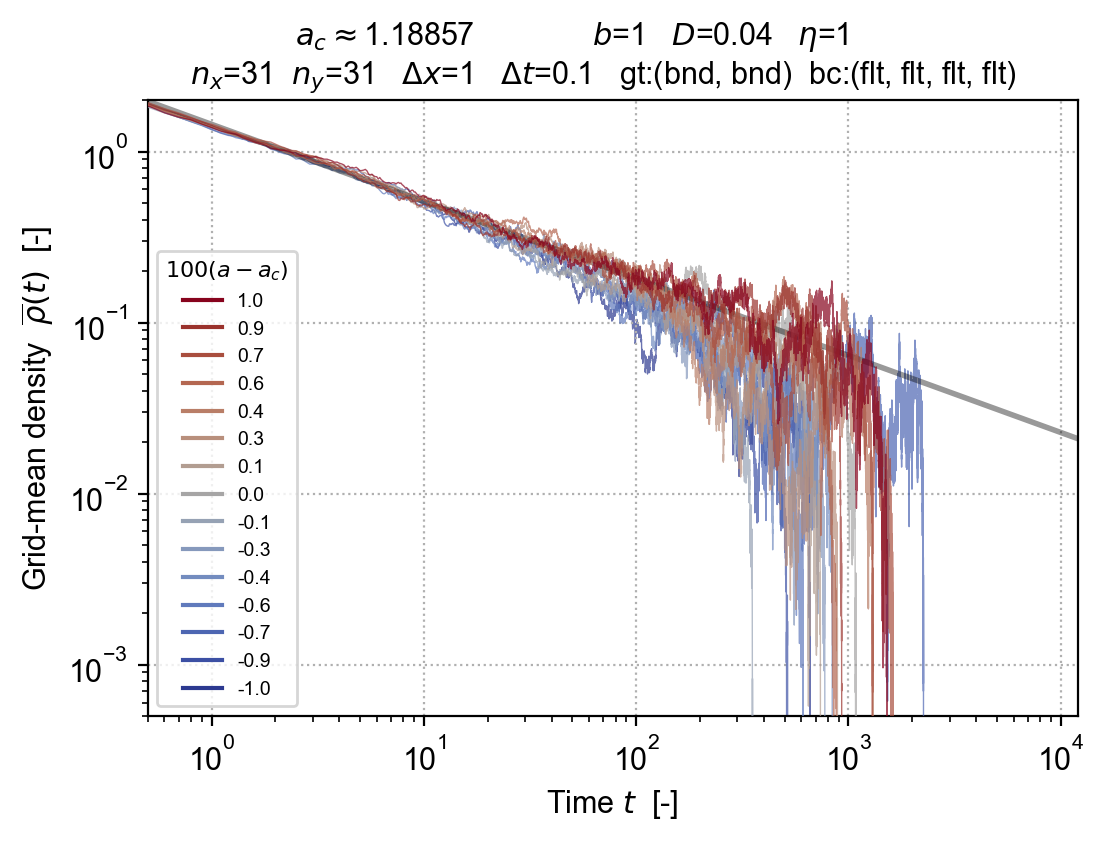

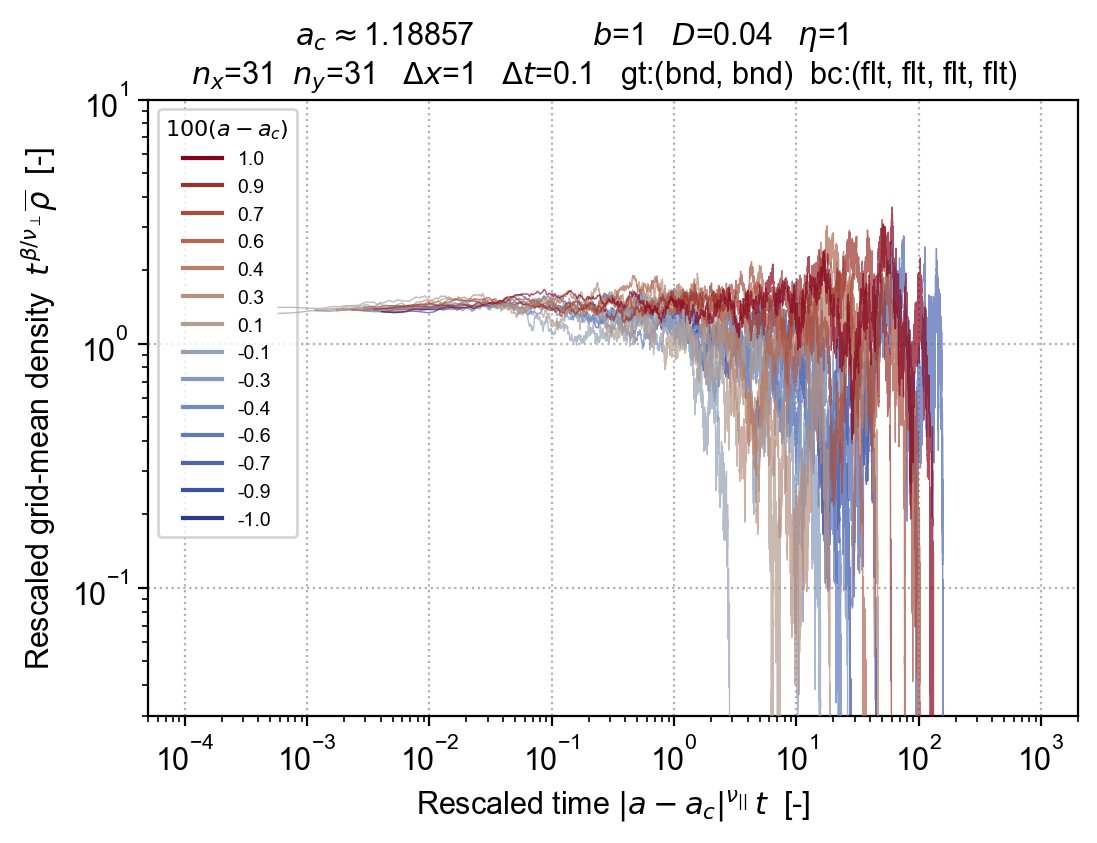

In [10]:
ensemble.multi_plot()
display(ensemble.graphs.fdict["ρ_t_loglog"])
display(ensemble.graphs.fdict["ρ_t_rescaled"])

In [11]:
ensemble.plot()

In [12]:
ensemble.save(dplvn, do_dummy=False)

experiments outfo path:  ./../../experiments/ac1p18857/b1_D0p04_η1_x31_y31_Δx1_Δt0p1/
Combo graph path:  ./../../experiments/ac1p18857/b1_D0p04_η1_x31_y31_Δx1_Δt0p1/
Combo data path:  ./../../experiments/ac1p18857/b1_D0p04_η1_x31_y31_Δx1_Δt0p1/
